In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
plt.style.use('bmh')

In [3]:
np.random.seed(1)

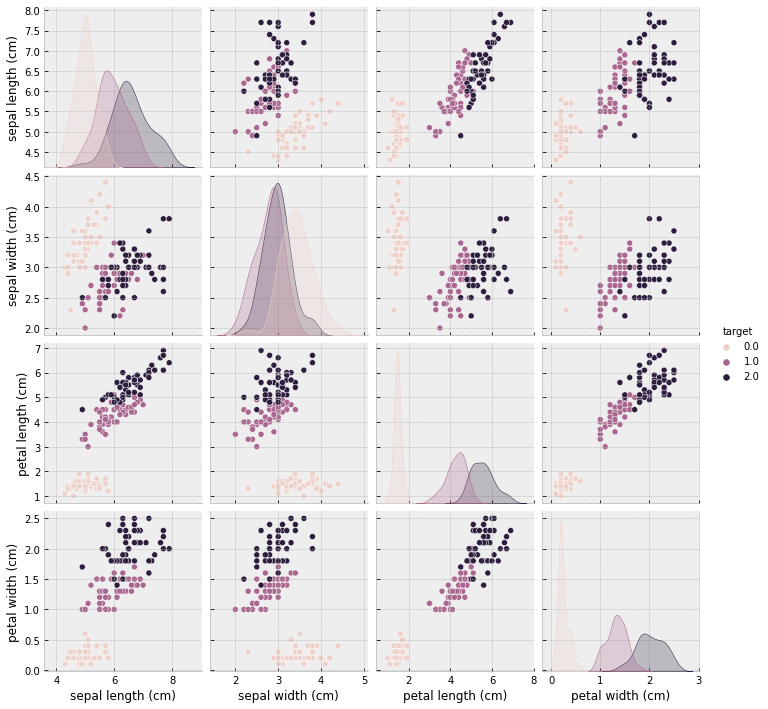

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Определение функций, которые понадобяться для обучения
# преобразование массива в бинарный вид результатов
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

# преобразование массива в необходимый вид
def from_one_hot(Y):
    arr = np.zeros((len(Y), 1))

    for i in range(len(Y)):
        l = Y[i]
        for j in range(len(l)):
            if(l[j] == 1):
                arr[i] = j+1
    return arr

def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)

# Подготовка тренировочных данных
# получения данных из csv файла. укажите здесь путь к файлу Iris.csv
TARGET = 'target'
iris = load_iris()
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
iris_df[TARGET].astype(int)

# репрезентация данных в виде графиков
g = sns.pairplot(iris_df, hue=TARGET)

x = iris_df.drop(columns=[TARGET])
#x = normalize(x.as_matrix())
x = normalize(x.values)

# формирование выходных данных(результатов)
y = pd.DataFrame(iris_df[TARGET], columns=[TARGET])
#y = y.as_matrix()
y = y.values
y = y.flatten()
y = to_one_hot(y.astype(int))

# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

In [5]:
# вычисление сигмоид функции
def sigmoid(x):
     return 1 / (1 + np.exp(-x))

# вычисление производной от сигмоид функции
def sigmoid_deriv(x):
        return x * (1 - x)
    
# вычисление Relu функции

def ReLU(x):
         return x  *  (x  >  0)
# вычисление производной от Relu функции
def relu_deriv(x):
    return x>0

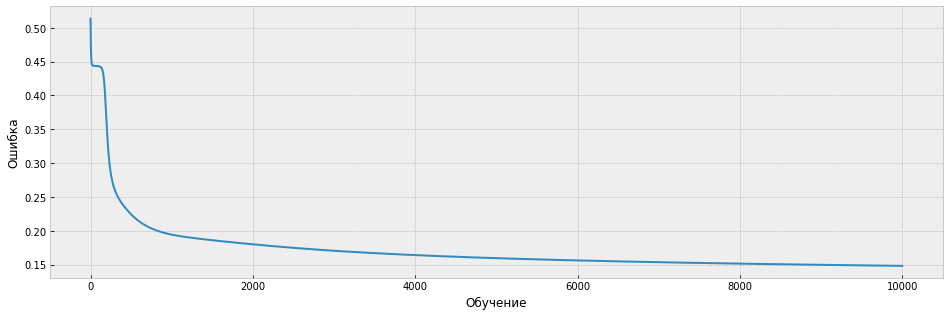

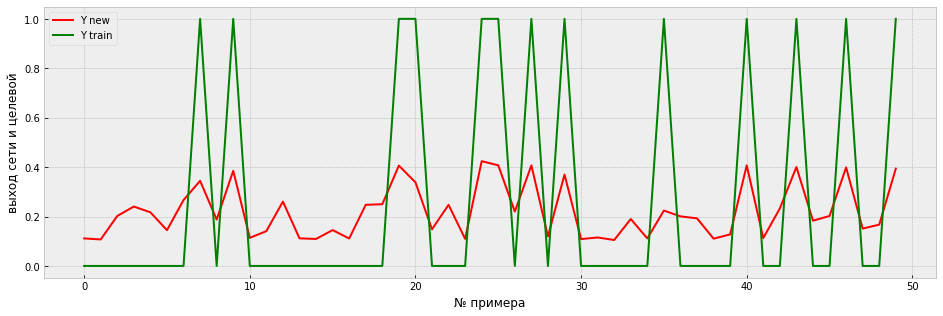

Аккуратность нейронной сети 85.19%


In [6]:
# Обученние нейронной сети

# определим число нейронов скрытого слоя
neuron_numb = 2

# присваевание случайных весов
w0 = 2*np.random.random((4, neuron_numb)) - 1 # для входного слоя   - 4 входа, 3 выхода
w1 = 2*np.random.random((neuron_numb, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода

# скорость обучения (learning rate)
n = 0.05

# массив для ошибок, чтобы потом построить график
errors = []

# процесс обучения
for i in range(10000):

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    # обратное распространение(back propagation) с использованием градиентного спуска
    layer2_error = y_train - layer2 # производная функции потерь = производная квадратичных потерь 
    layer2_delta = layer2_error * sigmoid_deriv(layer2)
    
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)
    # коррекция
    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n
    # метрика модели
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100

### Шаг 4. Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения
plt.figure(figsize = (16,5))
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show() # расскоментируйте, чтобы посмотреть 

N = 50
plt.figure(figsize = (16,5))
plt.plot(layer2[:N,1], 'r',label = 'Y new')
plt.plot(y_train[:N,1],'g', label = 'Y train')
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend( )
plt.show() # расскоментируйте, чтобы посмотреть 
        
print("Аккуратность нейронной сети " + str(round(accuracy,2)) + "%")

In [7]:
from hw1.model import Model
from hw1.layerlib import StartLayer, HiddenLayer, FinishLayer
from hw1.activationlib import Sigmoid, ReLU
from hw1.metrictool import MetricRegressionManager

In [8]:
learning_rate_fit_metric = MetricRegressionManager('Изменяем learning rate')

In [9]:
model = Model(
        layer_map=[
            StartLayer(neuron=4),
            HiddenLayer(neuron=5, activation=Sigmoid()),
            FinishLayer(neuron=3, activation=Sigmoid())
        ],
        epoch_num=10000,
        learning_rate=0.05
    )
errors, run_time = model.fit(X_train, y_train)
learning_rate_fit_metric.apply(
    str(model),
    errors,
    run_time
    )



In [10]:
model = Model(
        layer_map=[
            StartLayer(neuron=4),
            HiddenLayer(neuron=5, activation=Sigmoid()),
            FinishLayer(neuron=3, activation=Sigmoid())
        ],
        epoch_num=10000,
        learning_rate=0.10
    )
errors, run_time = model.fit(X_train, y_train)
learning_rate_fit_metric.apply(
    str(model),
    errors,
    run_time
    )

In [11]:
model = Model(
        layer_map=[
            StartLayer(neuron=4),
            HiddenLayer(neuron=5, activation=Sigmoid()),
            FinishLayer(neuron=3, activation=Sigmoid())
        ],
        epoch_num=10000,
        learning_rate=2
    )
errors, run_time = model.fit(X_train, y_train)
learning_rate_fit_metric.apply(
    str(model),
    errors,
    run_time
    )

In [12]:
model = Model(
        layer_map=[
            StartLayer(neuron=4),
            HiddenLayer(neuron=5, activation=Sigmoid()),
            FinishLayer(neuron=3, activation=Sigmoid())
        ],
        epoch_num=10000,
        learning_rate=0.01
    )
errors, run_time = model.fit(X_train, y_train)
learning_rate_fit_metric.apply(
    str(model),
    errors,
    run_time
    )

In [13]:
model = Model(
        layer_map=[
            StartLayer(neuron=4),
            HiddenLayer(neuron=5, activation=Sigmoid()),
            FinishLayer(neuron=3, activation=Sigmoid())
        ],
        epoch_num=10000,
        learning_rate=0.001
    )
errors, run_time = model.fit(X_train, y_train)
learning_rate_fit_metric.apply(
    str(model),
    errors,
    run_time
    )

In [14]:
epoch_fit_metric = MetricRegressionManager('Изменяем количество эпох')

In [15]:
model = Model(
        layer_map=[
            StartLayer(neuron=4),
            HiddenLayer(neuron=5, activation=Sigmoid()),
            FinishLayer(neuron=3, activation=Sigmoid())
        ],
        epoch_num=10000,
        learning_rate=0.05
    )
errors, run_time = model.fit(X_train, y_train)
epoch_fit_metric.apply(
    str(model),
    errors,
    run_time
    )

In [16]:
model = Model(
        layer_map=[
            StartLayer(neuron=4),
            HiddenLayer(neuron=5, activation=Sigmoid()),
            FinishLayer(neuron=3, activation=Sigmoid())
        ],
        epoch_num=100,
        learning_rate=0.05
    )
errors, run_time = model.fit(X_train, y_train)
epoch_fit_metric.apply(
    str(model),
    errors,
    run_time
    )

In [17]:
model = Model(
        layer_map=[
            StartLayer(neuron=4),
            HiddenLayer(neuron=5, activation=Sigmoid()),
            FinishLayer(neuron=3, activation=Sigmoid())
        ],
        epoch_num=1000,
        learning_rate=0.05
    )
errors, run_time = model.fit(X_train, y_train)
epoch_fit_metric.apply(
    str(model),
    errors,
    run_time
    )

In [18]:
neuron_fit_metric = MetricRegressionManager('Изменяем количество нейронов')

In [19]:
model = Model(
        layer_map=[
            StartLayer(neuron=4),
            HiddenLayer(neuron=5, activation=Sigmoid()),
            FinishLayer(neuron=3, activation=Sigmoid())
        ],
        epoch_num=10000,
        learning_rate=0.05
    )
errors, run_time = model.fit(X_train, y_train)
neuron_fit_metric.apply(
    str(model),
    errors,
    run_time
    )

In [20]:
model = Model(
        layer_map=[
            StartLayer(neuron=4),
            HiddenLayer(neuron=2, activation=Sigmoid()),
            FinishLayer(neuron=3, activation=Sigmoid())
        ],
        epoch_num=10000,
        learning_rate=0.05
    )
errors, run_time = model.fit(X_train, y_train)
neuron_fit_metric.apply(
    str(model),
    errors,
    run_time
    )

In [21]:
model = Model(
        layer_map=[
            StartLayer(neuron=4),
            HiddenLayer(neuron=15, activation=Sigmoid()),
            FinishLayer(neuron=3, activation=Sigmoid())
        ],
        epoch_num=10000,
        learning_rate=0.05
    )
errors, run_time = model.fit(X_train, y_train)
neuron_fit_metric.apply(
    str(model),
    errors,
    run_time
    )

In [22]:
model = Model(
        layer_map=[
            StartLayer(neuron=4),
            HiddenLayer(neuron=100, activation=Sigmoid()),
            FinishLayer(neuron=3, activation=Sigmoid())
        ],
        epoch_num=10000,
        learning_rate=0.05
    )
errors, run_time = model.fit(X_train, y_train)
neuron_fit_metric.apply(
    str(model),
    errors,
    run_time
    )

In [23]:
activation_fit_metric = MetricRegressionManager('Изменяем функцию активации')

In [24]:
model = Model(
        layer_map=[
            StartLayer(neuron=4),
            HiddenLayer(neuron=5, activation=Sigmoid()),
            FinishLayer(neuron=3, activation=Sigmoid())
        ],
        epoch_num=10000,
        learning_rate=0.05
    )
errors, run_time = model.fit(X_train, y_train)
activation_fit_metric.apply(
    str(model),
    errors,
    run_time
    )

In [25]:
model = Model(
        layer_map=[
            StartLayer(neuron=4),
            HiddenLayer(neuron=5, activation=ReLU()),
            FinishLayer(neuron=3, activation=Sigmoid())
        ],
        epoch_num=10000,
        learning_rate=0.05
    )
errors, run_time = model.fit(X_train, y_train)
activation_fit_metric.apply(
    str(model),
    errors,
    run_time
    )

In [26]:
model = Model(
        layer_map=[
            StartLayer(neuron=4),
            HiddenLayer(neuron=5, activation=Sigmoid()),
            FinishLayer(neuron=3, activation=ReLU())
        ],
        epoch_num=10000,
        learning_rate=0.05
    )
errors, run_time = model.fit(X_train, y_train)
activation_fit_metric.apply(
    str(model),
    errors,
    run_time
    )

In [27]:
model = Model(
        layer_map=[
            StartLayer(neuron=4),
            HiddenLayer(neuron=5, activation=ReLU()),
            FinishLayer(neuron=3, activation=ReLU())
        ],
        epoch_num=10000,
        learning_rate=0.05
    )
errors, run_time = model.fit(X_train, y_train)
activation_fit_metric.apply(
    str(model),
    errors,
    run_time
    )

In [28]:
layer_fit_metric = MetricRegressionManager('Изменяем кол-во скрытых слоев')

In [29]:
model = Model(
        layer_map=[
            StartLayer(neuron=4),
            HiddenLayer(neuron=5, activation=Sigmoid()),
            FinishLayer(neuron=3, activation=Sigmoid())
        ],
        epoch_num=10000,
        learning_rate=0.05
    )
errors, run_time = model.fit(X_train, y_train)
layer_fit_metric.apply(
    str(model),
    errors,
    run_time
    )

In [30]:
model = Model(
        layer_map=[
            StartLayer(neuron=4),
            HiddenLayer(neuron=5, activation=Sigmoid()),
            HiddenLayer(neuron=5, activation=Sigmoid()),
            FinishLayer(neuron=3, activation=Sigmoid())
        ],
        epoch_num=10000,
        learning_rate=0.05
    )
errors, run_time = model.fit(X_train, y_train)
layer_fit_metric.apply(
    str(model),
    errors,
    run_time
    )

In [31]:
model = Model(
        layer_map=[
            StartLayer(neuron=4),
            HiddenLayer(neuron=5, activation=Sigmoid()),
            HiddenLayer(neuron=5, activation=Sigmoid()),
            HiddenLayer(neuron=5, activation=Sigmoid()),
            HiddenLayer(neuron=5, activation=Sigmoid()),
            HiddenLayer(neuron=5, activation=Sigmoid()),
            FinishLayer(neuron=3, activation=Sigmoid())
        ],
        epoch_num=10000,
        learning_rate=0.05
    )
errors, run_time = model.fit(X_train, y_train)
layer_fit_metric.apply(
    str(model),
    errors,
    run_time
    )

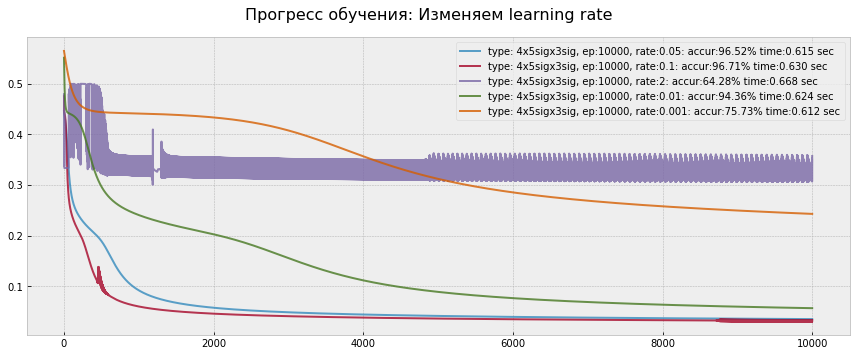

Name model                               Accuracy    Time
---------------------------------------  ----------  ---------
type: 4x5sigx3sig, ep:10000, rate:0.05   96.52%      0.615 sec
type: 4x5sigx3sig, ep:10000, rate:0.1    96.71%      0.630 sec
type: 4x5sigx3sig, ep:10000, rate:2      64.28%      0.668 sec
type: 4x5sigx3sig, ep:10000, rate:0.01   94.36%      0.624 sec
type: 4x5sigx3sig, ep:10000, rate:0.001  75.73%      0.612 sec


In [32]:
learning_rate_fit_metric.show_report()

- При очень маленькой величине learning_rate модель не успевает обучится(долго учится), либо застревает в ложном минимуме. 
- При больших значениях learning_rate модель, модель не может точно найти минимум, и возникают значительные колебания точности модели.
- Остановимся на **learning_rate = 0.05**

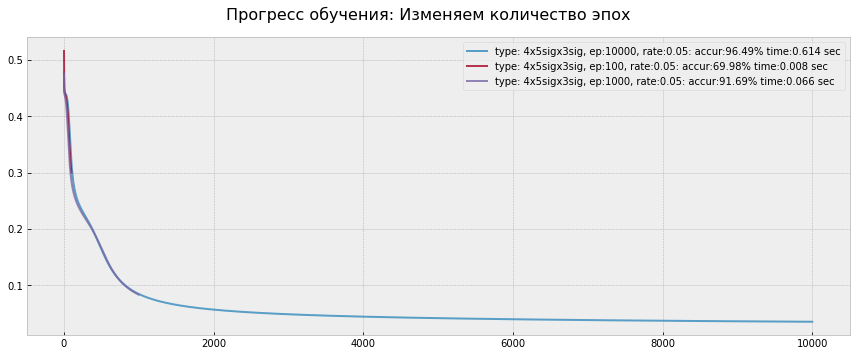

Name model                              Accuracy    Time
--------------------------------------  ----------  ---------
type: 4x5sigx3sig, ep:10000, rate:0.05  96.49%      0.614 sec
type: 4x5sigx3sig, ep:100, rate:0.05    69.98%      0.008 sec
type: 4x5sigx3sig, ep:1000, rate:0.05   91.69%      0.066 sec


In [33]:
epoch_fit_metric.show_report()

- Здесь видно что при небольшом количестве эпох модель не успевает обучится
- При больших значениях можем получить переобучение
- Остановимся на **epoch_num=6000**

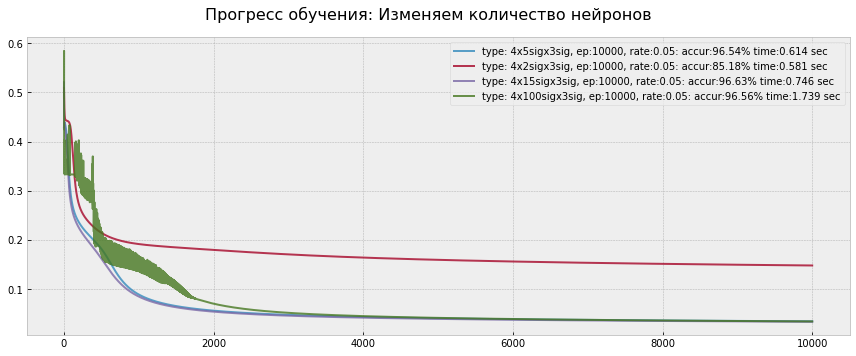

Name model                                Accuracy    Time
----------------------------------------  ----------  ---------
type: 4x5sigx3sig, ep:10000, rate:0.05    96.54%      0.614 sec
type: 4x2sigx3sig, ep:10000, rate:0.05    85.18%      0.581 sec
type: 4x15sigx3sig, ep:10000, rate:0.05   96.63%      0.746 sec
type: 4x100sigx3sig, ep:10000, rate:0.05  96.56%      1.739 sec


In [34]:
neuron_fit_metric.show_report()

- При малом количестве нейронов в слое получаем низкую точность при обучении, но время обучения ниже чем у других моделей
- При большом количестве нейронов модель на начально этапе обучается не стабильно, есть большие колебания точности. Так же увеличивается время обучение
- Остановимся на **neuron = 10** 

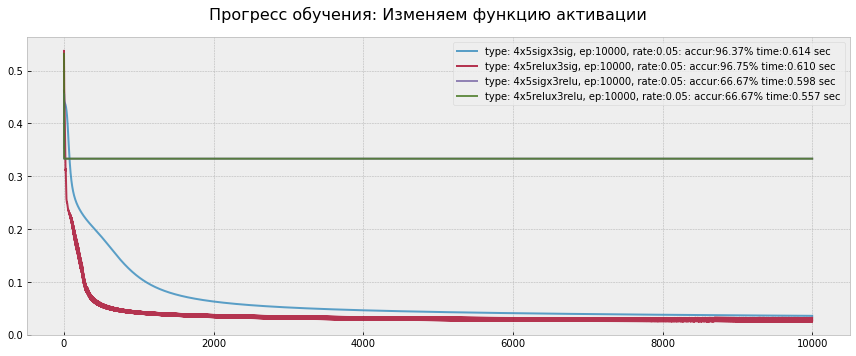

Name model                                Accuracy    Time
----------------------------------------  ----------  ---------
type: 4x5sigx3sig, ep:10000, rate:0.05    96.37%      0.614 sec
type: 4x5relux3sig, ep:10000, rate:0.05   96.75%      0.610 sec
type: 4x5sigx3relu, ep:10000, rate:0.05   66.67%      0.598 sec
type: 4x5relux3relu, ep:10000, rate:0.05  66.67%      0.557 sec


In [35]:
activation_fit_metric.show_report()

- Функция активации ReLU на выходе дает большую ошибку
- Функция активации ReLU в скрытом слое дает небольшие колебания в точности
- Наиболееприемлемый результат доет ф-ция активации **Sigmoid**

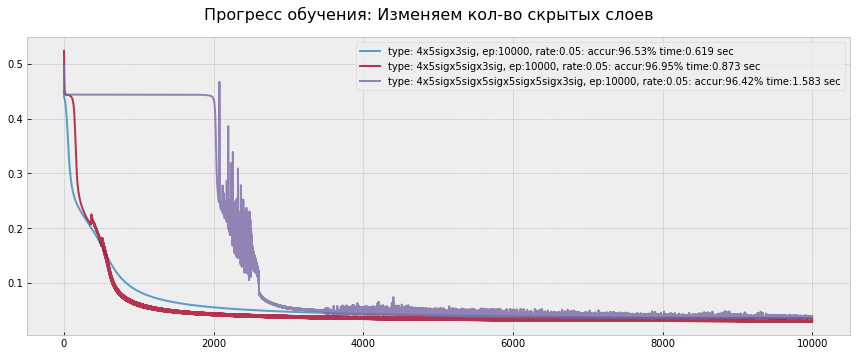

Name model                                                  Accuracy    Time
----------------------------------------------------------  ----------  ---------
type: 4x5sigx3sig, ep:10000, rate:0.05                      96.53%      0.619 sec
type: 4x5sigx5sigx3sig, ep:10000, rate:0.05                 96.95%      0.873 sec
type: 4x5sigx5sigx5sigx5sigx5sigx3sig, ep:10000, rate:0.05  96.42%      1.583 sec


In [36]:
layer_fit_metric.show_report()

- При увеличении слоёв, появляются колебания, возможно из за того что градиентный спуск не может найти минимум, 
- Так же при увеличении слоёв время обучения увеличивается
- Попробуем уменьшить learning rate и увеличим число эпох, т.к. при малых значениях learning rate модель не успевала обучится

In [37]:
model = Model(
        layer_map=[
            StartLayer(neuron=4),
            HiddenLayer(neuron=5, activation=Sigmoid()),
            HiddenLayer(neuron=5, activation=Sigmoid()),
            HiddenLayer(neuron=5, activation=Sigmoid()),
            FinishLayer(neuron=3, activation=Sigmoid())
        ],
        epoch_num=20000,
        learning_rate=0.005
    )
errors, run_time = model.fit(X_train, y_train)
layer_fit_metric.apply(
    str(model),
    errors,
    run_time
    )

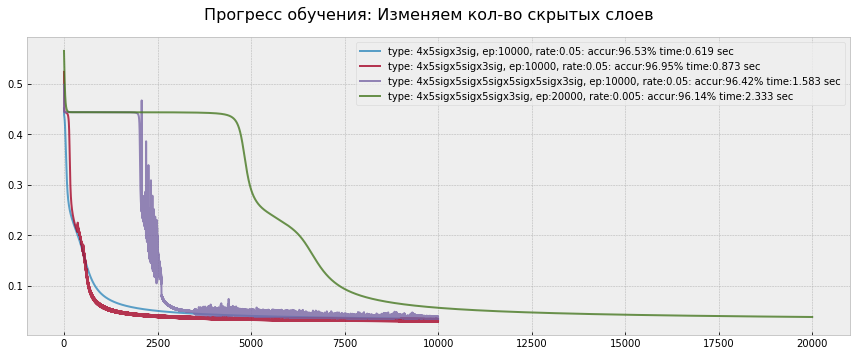

Name model                                                  Accuracy    Time
----------------------------------------------------------  ----------  ---------
type: 4x5sigx3sig, ep:10000, rate:0.05                      96.53%      0.619 sec
type: 4x5sigx5sigx3sig, ep:10000, rate:0.05                 96.95%      0.873 sec
type: 4x5sigx5sigx5sigx5sigx5sigx3sig, ep:10000, rate:0.05  96.42%      1.583 sec
type: 4x5sigx5sigx5sigx3sig, ep:20000, rate:0.005           96.14%      2.333 sec


In [38]:
layer_fit_metric.show_report()

- Видим что сильно увеличилось время обучения  но точность не изменилась
- Остановимся на **одном скрытом слое**

# Итоговая модель

In [39]:
fit_metric = MetricRegressionManager('Итоговая модель')

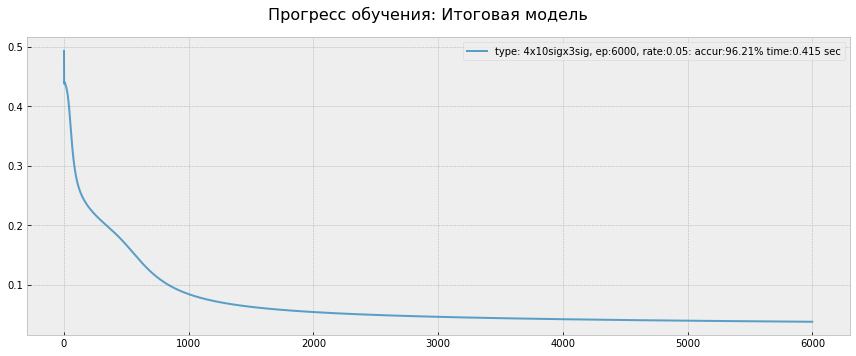

Name model                              Accuracy    Time
--------------------------------------  ----------  ---------
type: 4x10sigx3sig, ep:6000, rate:0.05  96.21%      0.415 sec


In [40]:
model = Model(
        layer_map=[
            StartLayer(neuron=4),
            HiddenLayer(neuron=10, activation=Sigmoid()),
            FinishLayer(neuron=3, activation=Sigmoid())
        ],
        epoch_num=6000,
        learning_rate=0.05
    )
errors, run_time = model.fit(X_train, y_train)
fit_metric.apply(
    str(model),
    errors,
    run_time
    )
fit_metric.show_report()

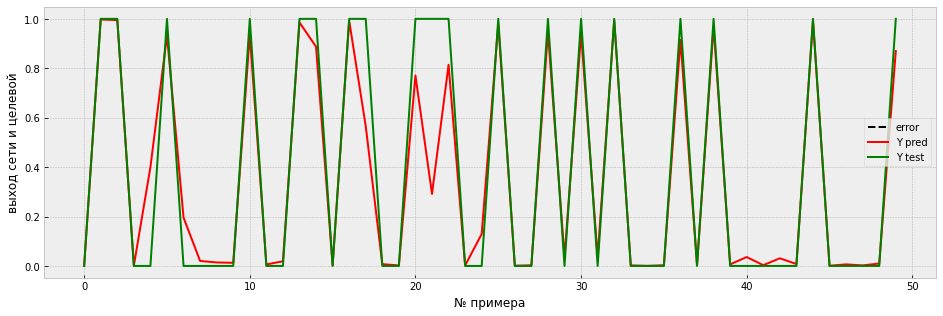

Аккуратность нейронной сети 96.13%


In [41]:
y_pred = model.predict_prob(X_test)
layer2_error = y_test - y_pred
error = np.mean(np.abs(layer2_error))
errors.append(error)
accuracy = (1 - error) * 100

N = 50
plt.figure(figsize = (16,5))
plt.plot(error, '--k', label = 'error')
plt.plot(y_pred[:N,1], 'r',label = 'Y pred')
plt.plot(y_test[:N,1],'g', label = 'Y test')
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend( )
plt.show() 
        
print("Аккуратность нейронной сети " + str(round(accuracy,2)) + "%")